In [1]:
import pandas as pd
import numpy as np
import holidays
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv('data_final_processed.csv')

In [3]:
print(df.head())

   Hour                      Title  Date  Month  DayOfWeek  Year  \
0     0  9/11 Cafe & Concept Store     1      1          6  2024   
1     1  9/11 Cafe & Concept Store     1      1          6  2024   
2     2  9/11 Cafe & Concept Store     1      1          6  2024   
3     3  9/11 Cafe & Concept Store     1      1          6  2024   
4     4  9/11 Cafe & Concept Store     1      1          6  2024   

   OccupancyPercent TimeCategory  
0               0.0        Night  
1               0.0        Night  
2               0.0        Night  
3               0.0        Night  
4               0.0        Night  


In [4]:
df.isnull().sum()

Hour                0
Title               0
Date                0
Month               0
DayOfWeek           0
Year                0
OccupancyPercent    0
TimeCategory        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78840 entries, 0 to 78839
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hour              78840 non-null  int64  
 1   Title             78840 non-null  object 
 2   Date              78840 non-null  int64  
 3   Month             78840 non-null  int64  
 4   DayOfWeek         78840 non-null  int64  
 5   Year              78840 non-null  int64  
 6   OccupancyPercent  78840 non-null  float64
 7   TimeCategory      78840 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
unique_values = df['Title'].nunique()
print(unique_values)

9


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['PlaceEncoded'] = label_encoder.fit_transform(df['Title'])


In [8]:

time_category_mapping = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}

df['TimeCategory'] = df['TimeCategory'].map(time_category_mapping)


In [9]:
df.head(1000)

,Hour,Title,Date,Month,DayOfWeek,Year,OccupancyPercent,TimeCategory,PlaceEncoded
0,0,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
1,1,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
2,2,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
3,3,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
4,4,9/11 Cafe & Concept Store,1,1,6,2024,0.000000,3,0
...,...,...,...,...,...,...,...,...,...
995,11,9/11 Cafe & Concept Store,4,6,6,2024,35.832958,0,0
996,12,9/11 Cafe & Concept Store,4,6,6,2024,59.346500,1,0
997,13,9/11 Cafe & Concept Store,4,6,6,2024,67.812271,1,0
998,14,9/11 Cafe & Concept Store,4,6,6,2024,70.979673,1,0


In [10]:
df['Datetime'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Date'].astype(str))


In [11]:
df

,Hour,Title,Date,Month,DayOfWeek,Year,OccupancyPercent,TimeCategory,PlaceEncoded,Datetime
0,0,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
1,1,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
2,2,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
3,3,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
4,4,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01
...,...,...,...,...,...,...,...,...,...,...
78835,19,Batu Bolong Temple,31,12,6,2024,0.0,2,8,2024-12-31
78836,20,Batu Bolong Temple,31,12,6,2024,0.0,2,8,2024-12-31
78837,21,Batu Bolong Temple,31,12,6,2024,0.0,3,8,2024-12-31
78838,22,Batu Bolong Temple,31,12,6,2024,0.0,3,8,2024-12-31


In [12]:
features = df[['Datetime', 'PlaceEncoded']]
target = df['OccupancyPercent']


In [ ]:

df['Day_Hour'] = df['Date'].astype(str) + "_" + df['Hour'].astype(str)
df['Day_Occupancy'] = df['Date'] * df['OccupancyPercent']
df['Month_Year'] = df['Month'].astype(str) + "_" + df['Year'].astype(str)
max_occupancy = df.groupby('PlaceEncoded')['OccupancyPercent'].transform('max')

df.head(150)

,Hour,Title,Date,Month,DayOfWeek,Year,OccupancyPercent,TimeCategory,PlaceEncoded,Datetime,Day_Hour,Day_Occupancy,Month_Year
0,0,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_0,0.0,1_2024
1,1,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_1,0.0,1_2024
2,2,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_2,0.0,1_2024
3,3,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_3,0.0,1_2024
4,4,9/11 Cafe & Concept Store,1,1,6,2024,0.0,3,0,2024-01-01,1_4,0.0,1_2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_1,0.0,7_2024
146,2,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_2,0.0,7_2024
147,3,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_3,0.0,7_2024
148,4,9/11 Cafe & Concept Store,1,7,5,2024,0.0,3,0,2024-07-01,1_4,0.0,7_2024


In [14]:
df[['PlaceEncoded', 'Day_Occupancy','TimeCategory', 'Day_Hour','OccupancyPercent']].corr()


,PlaceEncoded,Day_Occupancy,TimeCategory,Day_Hour,OccupancyPercent
PlaceEncoded,1.000000e+00,-0.070935,-4.849254e-16,6.698630e-15,-0.088785
Day_Occupancy,-7.093473e-02,1.000000,-2.806297e-01,6.195772e-01,0.801012
TimeCategory,-4.849254e-16,-0.280630,1.000000e+00,2.131128e-02,-0.350869
Day_Hour,6.698630e-15,0.619577,2.131128e-02,1.000000e+00,0.377616
OccupancyPercent,-8.878522e-02,0.801012,-3.508686e-01,3.776161e-01,1.000000


In [15]:
# Memisahkan fitur dan target
y = df['OccupancyPercent'].values.reshape(-1, 1) # Target
X = df[['Day_Occupancy', 'Day_Hour', 'PlaceEncoded','TimeCategory','Month_Year']]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test) 

# Normalize target
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [ ]:
# Membuat model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)), 
    Dropout(0.3), 
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear') 
])

# Kompilasi model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='loss', 
    patience=10,      
    restore_best_weights=True,  
    verbose=1        
)

# Melatih model
history=model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=80, batch_size=32)


Epoch 1/80


1971/1971 [==============================] - 5s 2ms/step - loss: 0.0156 - mae: 0.0812 - val_loss: 0.0052 - val_mae: 0.0427
Epoch 2/80
1971/1971 [==============================] - 4s 2ms/step - loss: 0.0062 - mae: 0.0491 - val_loss: 0.0028 - val_mae: 0.0258
Epoch 3/80
1971/1971 [==============================] - 3s 2ms/step - loss: 0.0049 - mae: 0.0437 - val_loss: 0.0024 - val_mae: 0.0261
Epoch 4/80
1971/1971 [==============================] - 4s 2ms/step - loss: 0.0044 - mae: 0.0416 - val_loss: 0.0025 - val_mae: 0.0255
Epoch 5/80
1971/1971 [==============================] - 4s 2ms/step - loss: 0.0039 - mae: 0.0400 - val_loss: 0.0018 - val_mae: 0.0196
Epoch 6/80
1971/1971 [==============================] - 4s 2ms/step - loss: 0.0037 - mae: 0.0389 - val_loss: 0.0013 - val_mae: 0.0148
Epoch 7/80
1971/1971 [==============================] - 4s 2ms/step - loss: 0.0036 - mae: 0.0384 - val_loss: 0.0014 - val_mae: 0.0173
Epoch 8/80
1971/1971 [==============================] - 4s 2

In [ ]:
 #Make predictions
predicted_values_scaled = model.predict(X_test_scaled)

predicted_values_original = scaler_y.inverse_transform(predicted_values_scaled)

y_test_original = scaler_y.inverse_transform(y_test_scaled)

for i in range(5):
    print(f"Predicted: {predicted_values_original[i][0]}, Actual: {y_test_original[i][0]}")

493/493 [==============================] - 1s 1ms/step
Predicted: -0.10114014148712158, Actual: 0.0
Predicted: 87.46833801269531, Actual: 86.89826609060687
Predicted: 0.3567606210708618, Actual: 0.0
Predicted: 43.4307975769043, Actual: 44.27403066367573
Predicted: 0.16569793224334717, Actual: 0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_original, predicted_values_original)
mse = mean_squared_error(y_test_original, predicted_values_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, predicted_values_original)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")



Mean Absolute Error (MAE): 1.2936342227109943
Mean Squared Error (MSE): 8.25864992398765
Root Mean Squared Error (RMSE): 2.8737866872799813
R-squared (R²): 0.9924235950015291


In [ ]:

decoded_places = label_encoder.inverse_transform(X_test['PlaceEncoded'])

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Date_Hour': X_test['Day_Hour'],
    'Month_Year': X_test['Month_Year'],
    'Place': decoded_places,
    'Actual_Occupancy': y_test_original.flatten(), 
    'Predicted_Occupancy': predicted_values_original.flatten()  
})

results_df

,Date_Hour,Month_Year,Place,Actual_Occupancy,Predicted_Occupancy
3200,12_8,2_2024,9/11 Cafe & Concept Store,0.000000,-0.101140
67718,23_14,3_2024,Banyumala twin waterfalls,86.898266,87.468338
74088,14_0,12_2024,Batu Bolong Temple,0.000000,0.356761
60042,26_18,12_2024,BATIK Restaurant,44.274031,43.430798
6312,22_0,12_2024,9/11 Cafe & Concept Store,0.000000,0.165698
...,...,...,...,...,...
75363,19_3,5_2024,Batu Bolong Temple,0.000000,0.390220
36330,5_18,6_2024,BAKED. Berawa,61.646335,63.260113
36954,7_18,8_2024,BAKED. Berawa,52.976703,53.461552
25134,27_6,6_2024,Air Terjun Munduk,36.904043,39.659138


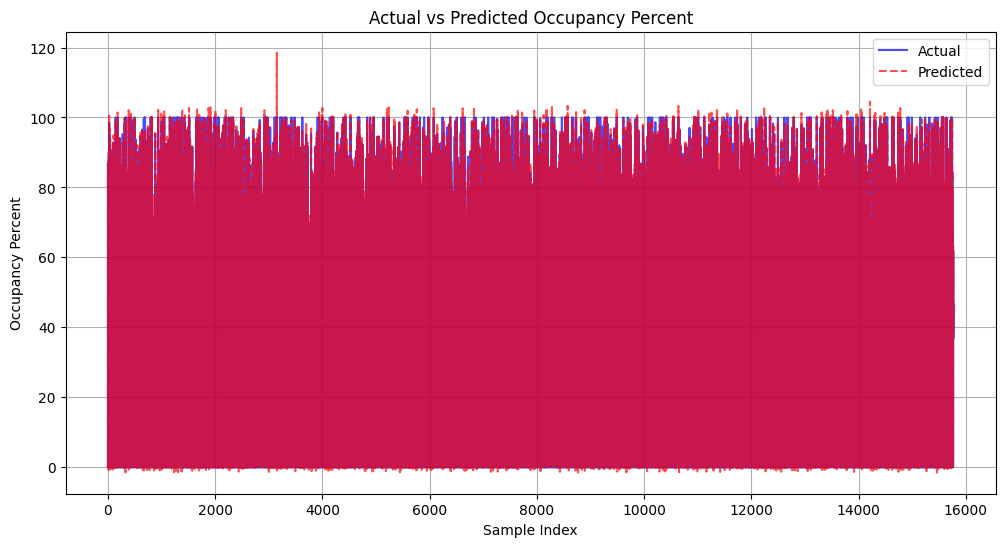

In [22]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual', color='blue', alpha=0.7, linewidth=1.5)
plt.plot(predicted_values_original, label='Predicted', color='red', alpha=0.7, linestyle='--', linewidth=1.5)
plt.title('Actual vs Predicted Occupancy Percent')
plt.xlabel('Sample Index')
plt.ylabel('Occupancy Percent')
plt.legend()
plt.grid(True)
plt.show()

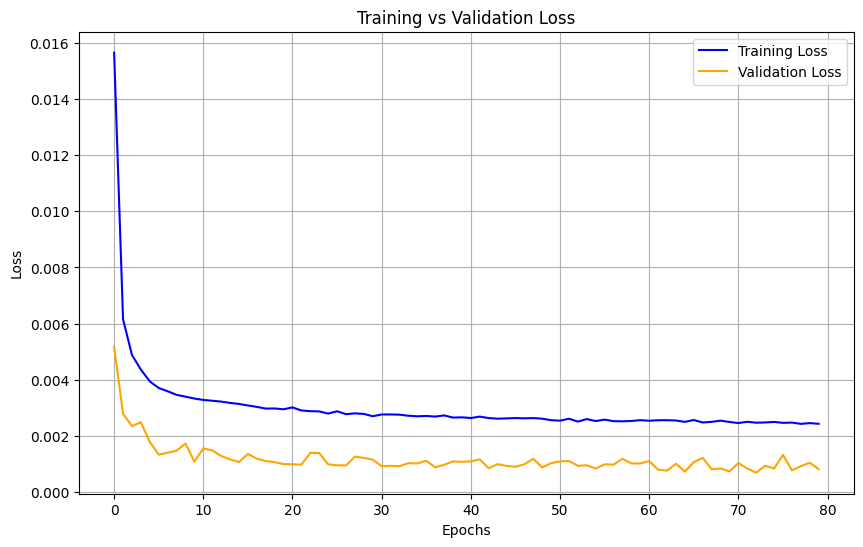

In [23]:
# Plot Training vs Validation Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Save the model
model.save('model_occupancy_fix.h5')

c:\Users\devon\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('model_occupancy_fix.h5')

In [26]:

# Example new data 
new_data = pd.DataFrame({
    'Day_Occupancy': [10, 20, 5],  # Example values
    'Day_Hour': ['1_11', '1_15', '1_20'],  # Example values
    'PlaceEncoded': [0, 0, 0],  # Example encoded values
    'TimeCategory': [0, 1, 3],  # Example time categories
    'Month_Year': ['3_2024', '3_2024', '3_2024']
})

new_data_scaled = scaler_X.transform(new_data)

predictions_scaled = loaded_model.predict(new_data_scaled)

predictions_original = scaler_y.inverse_transform(predictions_scaled)

for i in range(len(predictions_original)):
    print(f"Predicted Occupancy Percent for sample {i}: {predictions_original[i][0]}")

1/1 [==============================] - 0s 62ms/step
Predicted Occupancy Percent for sample 0: 1.7368525266647339
Predicted Occupancy Percent for sample 1: 18.459922790527344
Predicted Occupancy Percent for sample 2: 0.6628870964050293


In [ ]:
# Example new data with tanggal
new_data = pd.DataFrame({
    'Tanggal': ['2-10-2024 11:00', '2-10-2024 15:00', '2-10-2024 20:00']  
})

# Konversi tanggal ke format datetime
new_data['Tanggal'] = pd.to_datetime(new_data['Tanggal'], format='%d-%m-%Y %H:%M')

# Ekstrak day, month, year, dan hour dari tanggal
new_data['Day'] = new_data['Tanggal'].dt.day
new_data['Month'] = new_data['Tanggal'].dt.month
new_data['Year'] = new_data['Tanggal'].dt.year
new_data['Hour'] = new_data['Tanggal'].dt.hour

new_data['Day_Hour'] = new_data['Day'].astype(str) + '_' + new_data['Hour'].astype(str)

new_data['Month_Year'] = new_data['Month'].astype(str) + '_' + new_data['Year'].astype(str)

new_data['Day_Occupancy'] = [30, 50, 5]  
new_data['PlaceEncoded'] = [0, 0, 0]  
new_data['TimeCategory'] = [0, 2, 3]   

new_data_scaled = scaler_X.transform(new_data[['Day_Occupancy', 'Day_Hour', 'PlaceEncoded', 'TimeCategory','Month_Year']])

predictions_scaled = loaded_model.predict(new_data_scaled)

predictions_original = scaler_y.inverse_transform(predictions_scaled)


for i in range(len(predictions_original)):
    print(f"Predicted Occupancy Percent for sample {i}: {predictions_original[i][0]}")

1/1 [==============================] - 0s 20ms/step
Predicted Occupancy Percent for sample 0: 16.968246459960938
Predicted Occupancy Percent for sample 1: 27.07756996154785
Predicted Occupancy Percent for sample 2: 0.7225871086120605
